c:\Users\karino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\karino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\karino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\karino\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

Accuracy: 0.7900
ROC AUC: 0.8766
Recall: 0.8958
F1 Score: 0.8037

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77        52
           1       0.73      0.90      0.80        48

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



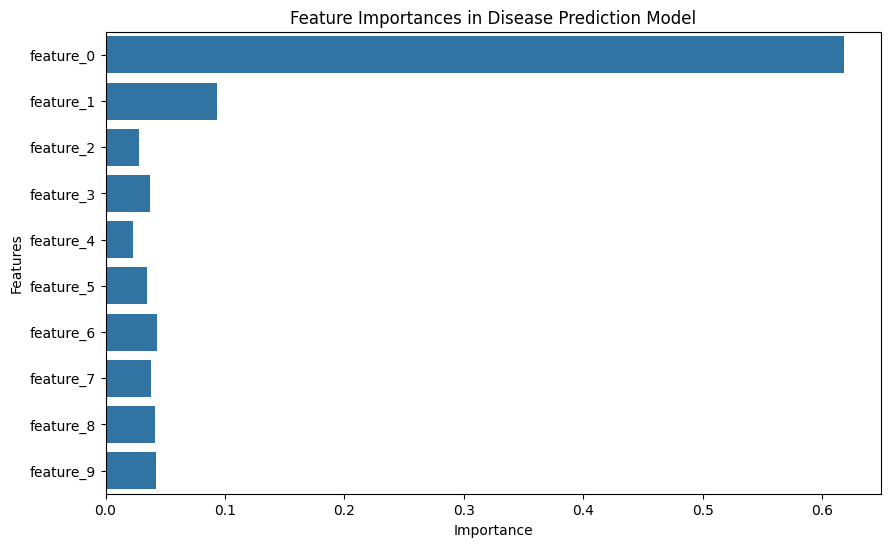

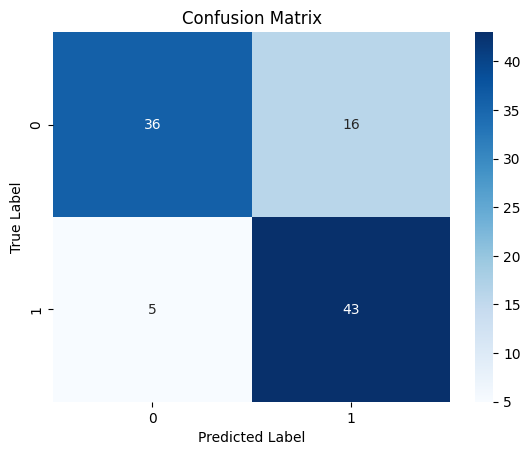

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data simulation
np.random.seed(42)
n_samples = 500
X = np.random.normal(loc=0, scale=1, size=(n_samples, 10))
y = (X[:, 0] + X[:, 1] * 0.2 + np.random.normal(loc=0, scale=0.5, size=n_samples) > 0).astype(int)

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# GridSearch for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, None]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances = best_rf.feature_importances_
sns.barplot(x=feature_importances, y=[f'feature_{i}' for i in range(X.shape[1])])
plt.title('Feature Importances in Disease Prediction Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
